In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [10]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [186]:
def decision_boundary(X, y, mean, std, theta):
    X = prepare_X((X-mean)/std)
    x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.show()

In [187]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    X_new = (X-mean)/std
    return X_new, mean, std

In [169]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [170]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [171]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [172]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta)))/m
    return J

In [173]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot(X.T, (h(X, theta) - y))
    
    return d_theta

In [174]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha*np.dot(X.T, (h(X, theta) - y))/m;
        J = cost_function(X, y, theta)
        J_history.append(J)
        if i % 1000 == 0 and print_J == True:
            print(J)
    return theta, J_history

In [175]:
def predict(X, mean, std, theta):
    X_test_proc = prepare_X(X)
    predictions = h(X_test_proc, theta)
    return predictions

In [176]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [177]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
#data_columns = ["test1", "test2"]
#target_column = "passed"
#X, y = load_datasets('tests.csv', data_columns, target_column)
#print('Training set: X={}, y={}'.format(X.shape, y.shape))

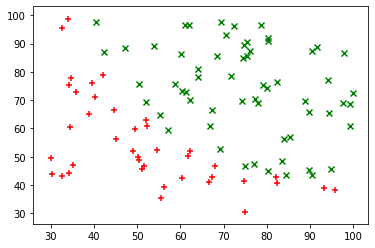

In [178]:
plot_data(X, y)

In [179]:
X_new, mean, std = normalize(X)

In [180]:

X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [181]:
theta = np.array([0, 0, 0])


In [182]:
cost_function(X_new, y_new, theta)

array([[0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147],
       [0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147],
       [0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147],
       ...,
       [0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147],
       [0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147],
       [0.00693147, 0.00693147, 0.00693147, ..., 0.00693147, 0.00693147,
        0.00693147]])

In [183]:
alpha = 0.01
iters = 1000
eps = 1e-7

new_theta, Js = gradient_descent(X_new, y, theta, alpha, eps, iters, False)
print(new_theta, len(Js))

[0.46741534 1.28615587 1.15327216] 1001


In [184]:
cost_function(X_new, y_new, new_theta)

array([[0.00353731, 0.00037154, 0.00288496, ..., 0.02918974, 0.00555387,
        0.02604647],
       [0.00353731, 0.00037154, 0.00288496, ..., 0.02918974, 0.00555387,
        0.02604647],
       [0.00353731, 0.00037154, 0.00288496, ..., 0.02918974, 0.00555387,
        0.02604647],
       ...,
       [0.01210875, 0.03311212, 0.01383855, ..., 0.00055501, 0.00852964,
        0.00076805],
       [0.01210875, 0.03311212, 0.01383855, ..., 0.00055501, 0.00852964,
        0.00076805],
       [0.01210875, 0.03311212, 0.01383855, ..., 0.00055501, 0.00852964,
        0.00076805]])

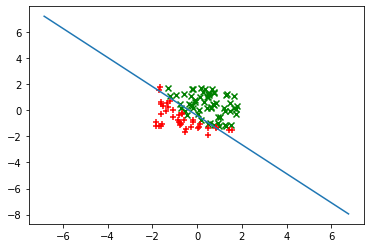

In [190]:
plot_data((X-mean)/std, y)
decision_boundary(X, y, mean, std, new_theta)

In [191]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

[1. 1.]
